# Numerical Estimation - Vehicle Models

Up until now we've assumed the vehicle state is sampled from a Gaussian distribution which can be updated over time to form a new Gaussian distribution. This isn't necessarily a valid assumption. In this case we have to reevaluate the following questions:

* How is the distribution updated?
* How is the distribution refined? (saved for later)

So how is the distribution updated? 

From the planning and control modules you've learned how actuations affect the vehicle state. It turns out we can reuse these update models to approximate updating the distribution. That is, given a distribution at time $t$, $D_t$, the distribution at time $t+1$, $D_{t+1}$ can be defined as:

$D_{t+1} = simulate(D_t) + w$

where `simulate` is the vehicle model function and $w$ is noise.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import create_grid, valid_location

In [3]:
plt.rcParams['figure.figsize'] = 14, 14

Load grid map. You should be familiar with this map from the planning module.

In [4]:
data = np.loadtxt('colliders.csv', delimiter=',', dtype='Float64', skiprows=2)
grid, _, _ = create_grid(data)

Initially there's a prior distribution over the vehicle state. This distribution can be of any form. For now we'll assume the vehicle is somewhere in on the map facing some direction. Essentially we currently know close to nothing, :(. 

Complete the function below `sample_from_prior` where the x, and y coordinates are sampled uniformly from the grid and $theta$ is also sampled uniformly (should be in radians).

In [7]:
def sample_from_prior(grid_map, N):
    samples = []
    
    # TODO: complete implementation
    while len(samples) < N:
        x = np.random.uniform(0, grid.shape[1])
        y = np.random.uniform(0, grid.shape[0])
        theta = np.random.uniform(-np.pi, np.pi)
        s = [x, y, theta]

        # Not required, these locations will be discarded
        # since they'll have a very low likelihood anyway.
        if valid_location(grid_map, int(x), int(y)):
            samples.append(s)        
    return np.array(samples)

Generate and plot samples from the prior.

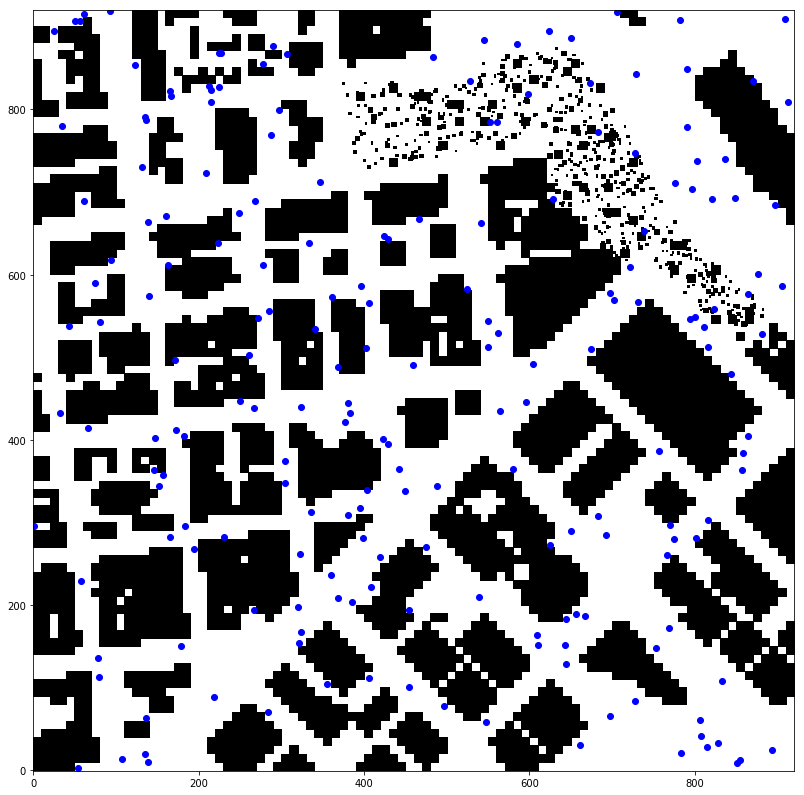

In [8]:
N = 200
samples = sample_from_prior(grid, N)

plt.figure()
plt.imshow(grid, origin='lower', cmap='Greys')
plt.plot(samples[:, 0], samples[:, 1], 'bo')
plt.show()

### Vehicle Simulation

We'll re-use the Dubin's car model from the planning module. If you use a different model just make sure to use it for the rest of the exercises. To recap, the Dubin's car model is defined as:

$
x_{t+1} = x_t + v * cos(\theta_t) * dt \\
y_{t+1} = y_t + v * sin(\theta_t) * dt \\
\theta_{t+1} = \theta_t + v * tan(u) * dt
$

During an update there's some noise, $w$ involved:

$
state_{t+1} = simulate(state_{t}, u, v, dt) + w
$

**NOTE: Be mindful of the noise associated with $\theta$ since the values are in radians.**

In [17]:
def simulate(state, angle=np.radians(0), v=5, dt=1):
    x, y, theta = state
    
    # TODO: complete implementation
    w = [np.random.normal(), np.random.normal(), np.random.normal(0, np.pi/2/10)]
    
    x_new = x + v*np.cos(theta)*dt + w[0]
    y_new = y + v*np.sin(theta)*dt + w[1]
    theta_new = theta + v*np.tan(angle)*dt + w[2]
    
    return np.array([x_new, y_new, theta_new])

In [18]:
new_samples = []
for i in range(N):
    new_samples.append(simulate(samples[i], v=60, dt=1.0)) 
new_samples = np.array(new_samples)

Plot samples generated from prior and samples after a single simulation iteration. The arrows illustrate the movement of samples.

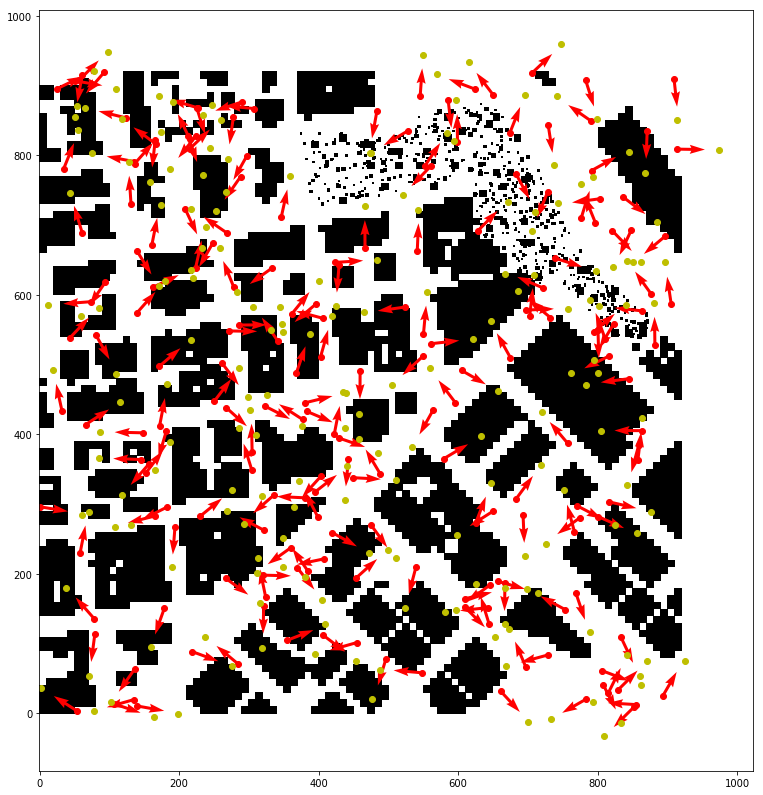

In [19]:
plt.figure()
plt.imshow(grid, origin='lower', cmap='Greys')
plt.plot(samples[:, 0], samples[:, 1], 'ro')
plt.quiver(samples[:, 0], samples[:, 1], np.cos(samples[:, 2]), np.sin(samples[:, 2]), 
           angles='xy', scale_units='xy', color='r')
plt.plot(new_samples[:, 0], new_samples[:, 1], 'yo')
plt.show()

Currently all samples are equally likely. In the next notebook you'll learn how do use sensor measurements to label some samples more likely than others.

[Solution](./Numerical-Estimation-Solution.ipynb)